In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv('../../data/ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

## 6-2-2

In [4]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", ytest.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", yval.shape)

X_train shape: (1177, 100, 1)
y_train shape: (1177,)
X_test shape: (325, 100, 1)
y_test shape: (325,)
X_val shape: (326, 100, 1)
y_val shape: (326,)


In [9]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 0.0051 - val_loss: 0.0118
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 8.3729e-04 - val_loss: 0.0064
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 6.4472e-04 - val_loss: 0.0057
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 5.9035e-04 - val_loss: 0.0059
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 5.7065e-04 - val_loss: 0.0037
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 5.1802e-04 - val_loss: 0.0038
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 4.7472e-04 - val_loss: 0.0032
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 4.2977e-04 - val_loss: 0.0029
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 4.0682e-04 - val_loss: 0.0026
Epoch 10/100
19/19 [==============================] - 0s 9ms/step - loss: 3.

19/19 [==============================] - 0s 7ms/step - loss: 1.3772e-04 - val_loss: 9.4857e-04
Epoch 80/100
19/19 [==============================] - 0s 7ms/step - loss: 1.4539e-04 - val_loss: 9.3762e-04
Epoch 81/100
19/19 [==============================] - 0s 7ms/step - loss: 1.3717e-04 - val_loss: 0.0019
Epoch 82/100
19/19 [==============================] - 0s 7ms/step - loss: 1.5608e-04 - val_loss: 9.1849e-04
Epoch 83/100
19/19 [==============================] - 0s 7ms/step - loss: 1.4535e-04 - val_loss: 9.1767e-04
Epoch 84/100
19/19 [==============================] - 0s 7ms/step - loss: 1.3816e-04 - val_loss: 0.0010
Epoch 85/100
19/19 [==============================] - 0s 7ms/step - loss: 1.5085e-04 - val_loss: 0.0011
Epoch 86/100
19/19 [==============================] - 0s 7ms/step - loss: 1.4339e-04 - val_loss: 0.0012
Epoch 87/100
19/19 [==============================] - 0s 7ms/step - loss: 1.4231e-04 - val_loss: 9.4600e-04
Epoch 88/100
19/19 [==============================] - 0s 

In [11]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

11/11 [==============================] - 0s 2ms/step


In [12]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [14]:
print('---------VALIDATE----------')
valid_mape = np.mean(np.abs( (yval - y_pred_val) / yval )) * 100
print('MAPE:', valid_mape)
valid_mae = np.mean(np.abs(y_pred_val - yval))
print('MAE:', valid_mae)
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('RMSE:', valid_rmse)
print('---------TEST-------------')
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('MAPE:', test_mape)
test_mae = np.mean(np.abs(y_pred - ytest))
print('MAE:', test_mae)
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('RMSE:', test_rmse)

---------VALIDATE----------
MAPE: 2.235314049566346
MAE: 37.37158952425229
RMSE: 49.44800562517683
---------TEST-------------
MAPE: 4.311069155480102
MAE: 112.83051230719953
RMSE: 146.6840380707399


In [15]:
val_data.shape

(427, 1)

In [17]:
x_input=val_data[326:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.37510924 0.37815887 0.37566241 0.37870563 0.38004325 0.37593455
 0.37477514 0.37808108 0.371164   0.37032783 0.36875763 0.37029641
 0.36870457 0.3685939  0.37470005 0.37438071 0.37363106 0.37286346
 0.3732369  0.37120428 0.3722419  0.36859261 0.36409289 0.33855752
 0.33348359 0.33528716 0.3385403  0.33482122 0.32776157 0.33736054
 0.33327198 0.33178935 0.33038736 0.33275767 0.33168832 0.34803179
 0.34282564 0.33024615 0.32661909 0.32842421 0.32823221 0.32686531
 0.3277059  0.32741462 0.33066054 0.32823647 0.32803014 0.32415232
 0.31036336 0.31899146 0.32228245 0.32629825 0.32940035 0.32804269
 0.32543577 0.32849224 0.32980314 0.32543448 0.31727343 0.31916889
 0.31929357 0.31654294 0.31812285 0.31920039 0.3200621  0.33177827
 0.33496395 0.33564461 0.34889577 0.33405098 0.33258266 0.33071127
 0.3230202  0.33028685 0.32789242 0.32768881 0.31632154 0.31376354
 0.3134551  0.30781982 0.31045892 0.31112886 0.31172385 0.32070576
 0.31328267 0.31292528 0.3137094  0.32157987 0.326

13 day output [[0.3737392]]
14 day input [0.37470005 0.37438071 0.37363106 0.37286346 0.3732369  0.37120428
 0.3722419  0.36859261 0.36409289 0.33855752 0.33348359 0.33528716
 0.3385403  0.33482122 0.32776157 0.33736054 0.33327198 0.33178935
 0.33038736 0.33275767 0.33168832 0.34803179 0.34282564 0.33024615
 0.32661909 0.32842421 0.32823221 0.32686531 0.3277059  0.32741462
 0.33066054 0.32823647 0.32803014 0.32415232 0.31036336 0.31899146
 0.32228245 0.32629825 0.32940035 0.32804269 0.32543577 0.32849224
 0.32980314 0.32543448 0.31727343 0.31916889 0.31929357 0.31654294
 0.31812285 0.31920039 0.3200621  0.33177827 0.33496395 0.33564461
 0.34889577 0.33405098 0.33258266 0.33071127 0.3230202  0.33028685
 0.32789242 0.32768881 0.31632154 0.31376354 0.3134551  0.30781982
 0.31045892 0.31112886 0.31172385 0.32070576 0.31328267 0.31292528
 0.3137094  0.32157987 0.3267911  0.33400918 0.3555738  0.3596042
 0.3602303  0.36375029 0.35867517 0.35795028 0.36195382 0.36502981
 0.36637725 0.37285613

27 day output [[0.42585418]]
28 day input [0.32776157 0.33736054 0.33327198 0.33178935 0.33038736 0.33275767
 0.33168832 0.34803179 0.34282564 0.33024615 0.32661909 0.32842421
 0.32823221 0.32686531 0.3277059  0.32741462 0.33066054 0.32823647
 0.32803014 0.32415232 0.31036336 0.31899146 0.32228245 0.32629825
 0.32940035 0.32804269 0.32543577 0.32849224 0.32980314 0.32543448
 0.31727343 0.31916889 0.31929357 0.31654294 0.31812285 0.31920039
 0.3200621  0.33177827 0.33496395 0.33564461 0.34889577 0.33405098
 0.33258266 0.33071127 0.3230202  0.33028685 0.32789242 0.32768881
 0.31632154 0.31376354 0.3134551  0.30781982 0.31045892 0.31112886
 0.31172385 0.32070576 0.31328267 0.31292528 0.3137094  0.32157987
 0.3267911  0.33400918 0.3555738  0.3596042  0.3602303  0.36375029
 0.35867517 0.35795028 0.36195382 0.36502981 0.36637725 0.37285613
 0.37034503 0.37372229 0.37589544 0.37538096 0.37211761 0.37377873
 0.37316796 0.37289825 0.3757863  0.37710381 0.37512684 0.37823042
 0.37474841 0.373739

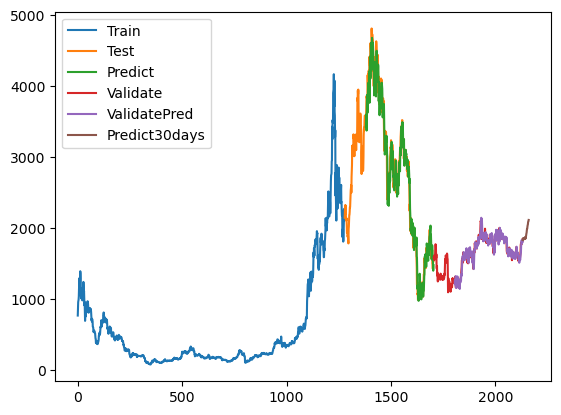

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()